In [1]:
pip install pandas matplotlib openpyxl seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import pandas as pd

file_path = "chegadas_2023.csv"
data = pd.read_csv(file_path, delimiter=";", encoding='ISO-8859-1')
data.head(50)



,Continente,cod continente,País,cod pais,UF,cod uf,Via,cod via,ano,Mês,cod mes,Chegadas
0,América do Sul,4,Peru,34,Acre,1,Aéreo,1,2023,Novembro,11,0
1,América do Sul,4,Peru,34,Acre,1,Aéreo,1,2023,Novembro,11,0
2,Ásia,5,Outros países,56,Outras Unidades da Federação,99,Aéreo,1,2023,Junho,6,0
3,Europa,6,Alemanha,57,Outras Unidades da Federação,99,Aéreo,1,2023,Janeiro,1,12
4,Europa,6,Alemanha,57,Outras Unidades da Federação,99,Aéreo,1,2023,Fevereiro,2,10
5,Europa,6,Alemanha,57,Outras Unidades da Federação,99,Aéreo,1,2023,Marco,3,3
6,Europa,6,Alemanha,57,Outras Unidades da Federação,99,Aéreo,1,2023,Abril,4,7
7,Europa,6,Alemanha,57,Outras Unidades da Federação,99,Aéreo,1,2023,Maio,5,3
8,Europa,6,Alemanha,57,Outras Unidades da Federação,99,Aéreo,1,2023,Junho,6,3
9,Europa,6,Alemanha,57,Outras Unidades da Federação,99,Aéreo,1,2023,Julho,7,1


In [9]:
print(data.isnull().sum())

Continente        0
cod continente    0
País              0
cod pais          0
UF                0
cod uf            0
Via               0
cod via           0
ano               0
Mês               0
cod mes           0
Chegadas          0
dtype: int64


# 1) Quais são as características principais do dataset?

O dataset possui 34764 e 12 colunas, contendo dimensões e variáveis numéricas sobre o registro da chegada de turistas



In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34764 entries, 0 to 34763
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Continente      34764 non-null  object
 1   cod continente  34764 non-null  int64 
 2   País            34764 non-null  object
 3   cod pais        34764 non-null  int64 
 4   UF              34764 non-null  object
 5   cod uf          34764 non-null  int64 
 6   Via             34764 non-null  object
 7   cod via         34764 non-null  int64 
 8   ano             34764 non-null  int64 
 9   Mês             34764 non-null  object
 10  cod mes         34764 non-null  int64 
 11  Chegadas        34764 non-null  int64 
dtypes: int64(7), object(5)
memory usage: 3.2+ MB


# 2) Quais padrões ou tendências podem ser observados nos dados?

É possível observar sazonalidade nas chegadas (maiores fluxos em meses específicos, como alta temporada turística). Certas rotas ou vias de transporte podem ser predominantes em função do continente ou país de origem algumas unidades federativas parecem receber mais chegadas, indicando polos turísticos ou econômicos

# 3) Como os dados foram preparados para análise?

Os dados estão bem organizados e as variáveis categóricas e numéricas foram corretamente separadas. Foi feito apenas uma 
Verificação de valores ausentes ou inconsistentes, e como não havia nenhum, não foi necessário demais procedimentos.

# 4) Que insights podem ser extraídos a partir de visualizações gráficas?

O dataset pode gerar insights como a tendências de chegadas ao longo dos meses, vias de transporte mais frequentes e chegadas por continente com destino (UF). Essas visualizações destacariam padrões de sazonalidade, fluxos internacionais e principais polos receptores.


# 5) Quais são as conclusões macros dos dados analisados?


O Brasil recebe chegadas por diferentes vias, mas é visível que o transporte aéreo é predominante, especialmente para fluxos internacionais. 
Algumas regiões (como estados do Sudeste ou capitais turísticas) concentram maior número de chegadas. 
Há sazonalidade no fluxo de chegadas, possivelmente correlacionada a feriados ou temporadas turísticas. 
Certos países ou continentes têm maior contribuição nas chegadas, sugerindo relações econômicas, geográficas ou culturais.


# 6) Quais são os continentes com maior número de chegadas registradas ao longo do ano de 2023? 

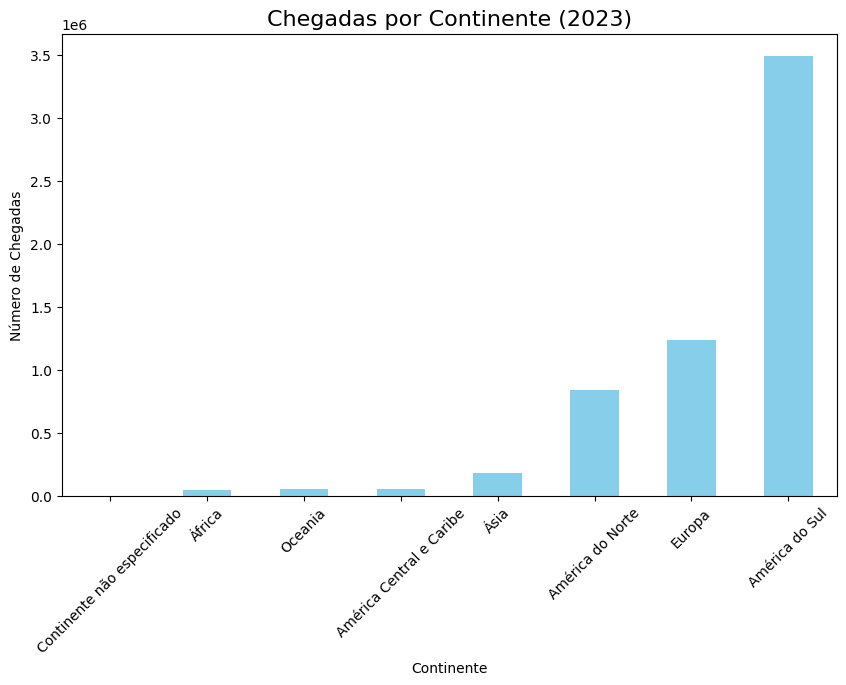

In [6]:
import matplotlib.pyplot as plt


chegadas_por_continente = data.groupby('Continente')['Chegadas'].sum()


plt.figure(figsize=(10, 6))
chegadas_por_continente.sort_values().plot(kind='bar', color='skyblue')
plt.title('Chegadas por Continente (2023)', fontsize=16)
plt.ylabel('Número de Chegadas')
plt.xlabel('Continente')
plt.xticks(rotation=45)
plt.show()

In [4]:
chegadas_por_mes = data.groupby('Continente')['Chegadas'].sum().reset_index()

print("Número de chegadas em cada mês (2023):\n")
print(chegadas_por_mes)

Número de chegadas em cada mês (2023):

                    Continente  Chegadas
0     América Central e Caribe     57747
1             América do Norte    837393
2               América do Sul   3492244
3  Continente não especificado        72
4                       Europa   1234351
5                      Oceania     56875
6                       África     46603
7                         Ásia    183056


# 7) Qual é a tendência mensal de chegadas por via de transporte?

<Figure size 1200x600 with 0 Axes>

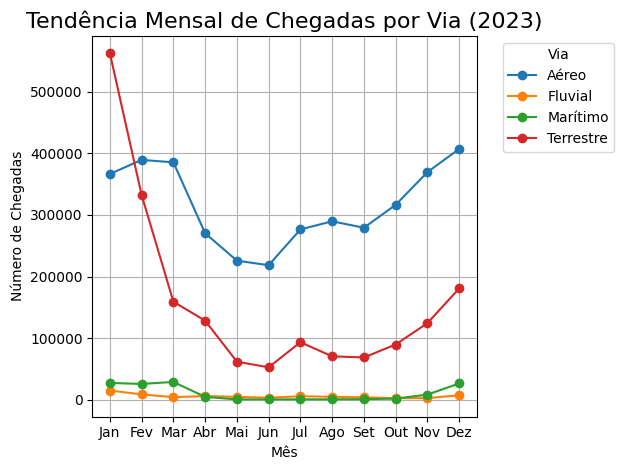

In [8]:
chegadas_por_mes_via = data.groupby(['cod mes', 'Via'])['Chegadas'].sum().unstack()


plt.figure(figsize=(12, 6))
chegadas_por_mes_via.plot(kind='line', marker='o')
plt.title('Tendência Mensal de Chegadas por Via (2023)', fontsize=16)
plt.ylabel('Número de Chegadas')
plt.xlabel('Mês')
plt.legend(title='Via', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(range(1, 13), ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
plt.grid(True)
plt.tight_layout()
plt.show()

In [69]:
chegadas_por_mes_via = data.groupby(['cod mes', 'Via'])['Chegadas'].sum().unstack().reset_index()

print("Número de chegadas por via de transporte (2023):\n")
print(chegadas_por_mes_via)

Número de chegadas por via de transporte (2023):

Via  cod mes   Aéreo  Fluvial  Marítimo  Terrestre
0          1  366577    14802     27098     562798
1          2  389390     8512     25525     332415
2          3  385442     3989     28714     159070
3          4  270275     5801      4476     128246
4          5  225811     4461       367      61736
5          6  218281     3199       364      52458
6          7  276493     5460       410      93285
7          8  289649     4580       497      70315
8          9  279190     3846       781      68538
9         10  316430     2310      1649      89535
10        11  369489     2480      8183     124243
11        12  407233     7038     26296     180604


# 8) Quais os 5 países com maior número de chegadas no Brasil em 2023?


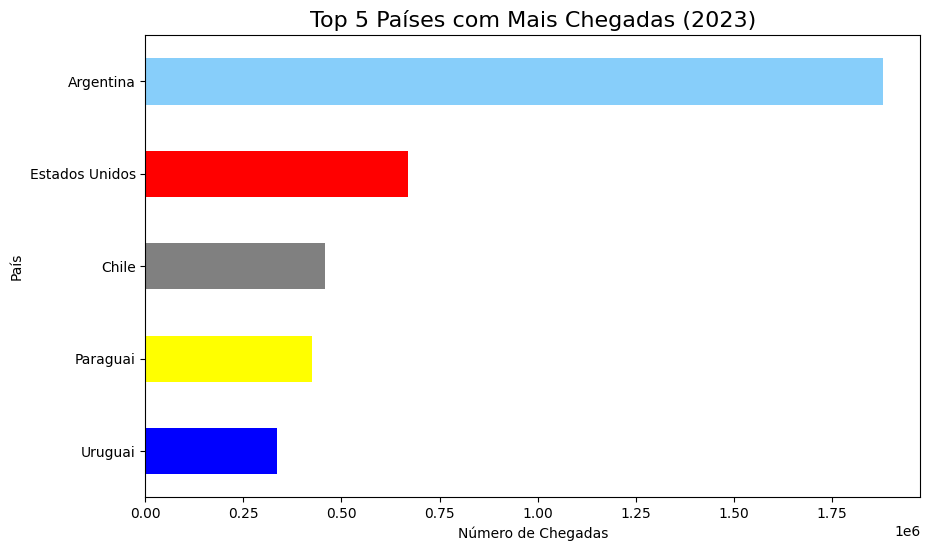

In [50]:
top_5_paises = data.groupby('País')['Chegadas'].sum().nlargest(5)


plt.figure(figsize=(10, 6))
colors = ["blue","yellow","grey","red","#87CEFA"]
top_5_paises.sort_values().plot(kind='barh', color= colors)
plt.title('Top 5 Países com Mais Chegadas (2023)', fontsize=16)
plt.xlabel('Número de Chegadas')
plt.ylabel('País')
plt.show()

In [68]:
top_5_paises = data.groupby('País')['Chegadas'].sum().nlargest(5).reset_index()
print("Top 5 Países com mais chegadas(2023):\n")
print(top_5_paises)

Top 5 Países com mais chegadas(2023):

             País  Chegadas
0       Argentina   1882240
1  Estados Unidos    668478
2           Chile    458576
3        Paraguai    424460
4         Uruguai    334703


# 9) Como estão distribuídas as chegadas por Unidade Federativa (UF)?


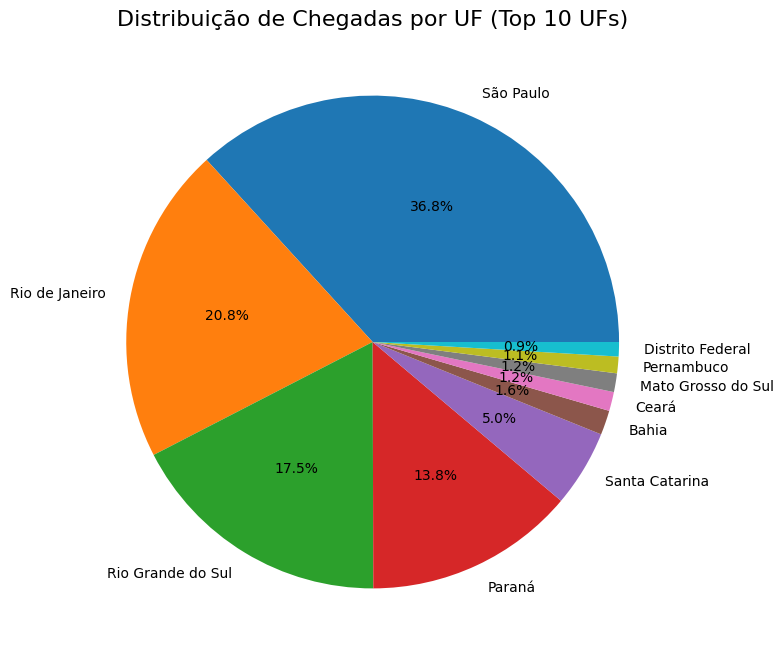

In [44]:
chegadas_por_uf = data.groupby('UF')['Chegadas'].sum()


plt.figure(figsize=(8, 8))
chegadas_por_uf.sort_values(ascending=False).head(10).plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribuição de Chegadas por UF (Top 10 UFs)', fontsize=16)
plt.ylabel('')
plt.show()

In [67]:
chegadas_por_uf = data.groupby('UF')['Chegadas'].sum().reset_index()
print("Distribuição de Chegadas por UF (Top 10 UFs):\n")
print(chegadas_por_uf)

Distribuição de Chegadas por UF (Top 10 UFs):

                              UF  Chegadas
0                           Acre     17205
1                          Amapá     31570
2                       Amazonas     24072
3                          Bahia     92059
4                          Ceará     71545
5               Distrito Federal     54006
6             Mato Grosso do Sul     70277
7                   Minas Gerais     38526
8   Outras Unidades da Federação     15304
9                         Paraná    791536
10                          Pará     21724
11                    Pernambuco     62559
12           Rio Grande do Norte     20368
13             Rio Grande do Sul   1000909
14                Rio de Janeiro   1192814
15                       Roraima      8259
16                Santa Catarina    288429
17                     São Paulo   2107179


# 10) Qual foi o mês com maior número de chegadas em 2023, considerando todas as vias?

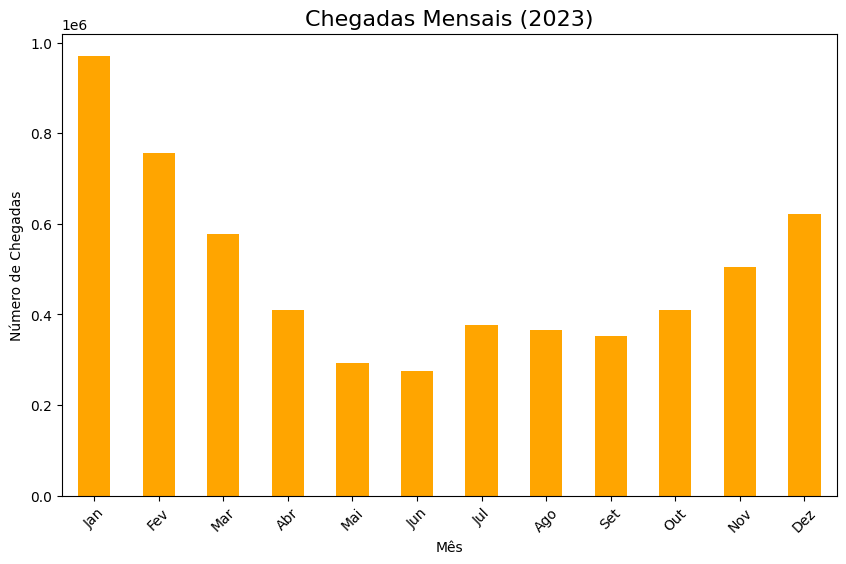

In [31]:
chegadas_por_mes = data.groupby('cod mes')['Chegadas'].sum()


plt.figure(figsize=(10, 6))
chegadas_por_mes.plot(kind='bar', color='orange')
plt.title('Chegadas Mensais (2023)', fontsize=16)
plt.ylabel('Número de Chegadas')
plt.xlabel('Mês')
plt.xticks(range(0, 12), ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'], rotation=45)
plt.show()

In [66]:
chegadas_por_mes = data.groupby('cod mes')['Chegadas'].sum().reset_index()


meses = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']
chegadas_por_mes.index = meses  


print("Número de chegadas em cada mês (2023):\n")
print(chegadas_por_mes)

Número de chegadas em cada mês (2023):

     cod mes  Chegadas
Jan        1    971275
Fev        2    755842
Mar        3    577215
Abr        4    408798
Mai        5    292375
Jun        6    274302
Jul        7    375648
Ago        8    365041
Set        9    352355
Out       10    409924
Nov       11    504395
Dez       12    621171
